In [1]:
import tensorflow as tf
import numpy as np 
import random 
import matplotlib.pyplot as plt 

In [12]:
# Defining some key methods
def label_to_output(label):
    o = [0]*10
    o[label] = 1
    return o

def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

def d_sigmoid(x):
    return sigmoid(x) * (1-sigmoid(x))

def get_loss(y, label):
    return ((0.5/y.shape[0]) * np.sum((y-label)**2))

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train, x_test = x_train/255, x_test/255

TRAIN_LENGTH = len(x_train) # 60000
TEST_LENGTH = len(x_test) # 10000

train_labels = np.zeros((TRAIN_LENGTH, 10))
for i, label in enumerate(y_train):
    train_labels[i] = (label_to_output(label))

test_labels = np.zeros((TEST_LENGTH, 10))
for i, label in enumerate(y_test):
    test_labels[i] = (label_to_output(label))

In [6]:
fcl_w = np.load('MLN_weights/fcl_w.npy')
fcl_b = np.load('MLN_weights/fcl_b.npy')
output_w = np.load('MLN_weights/output_w.npy')
output_b = np.load('MLN_weights/output_b.npy')

In [14]:
x = x_test
label = test_labels 
m = x.shape[0]

# Forward Pass
layer_input = x.reshape(-1, 784, 1)
a1 = sigmoid(np.matmul(fcl_w, layer_input) + fcl_b)
y = sigmoid(np.matmul(output_w, a1) + output_b)

predictions = np.argmax(y, axis = 1)
equals = predictions == y_test.reshape(m, 1)

loss = get_loss(y, label.reshape(-1, 10, 1))
accuracy = np.average(equals)

print('On test set: \n Loss: {:.3f} \n Accuracy: {:.2%}'.format(loss, accuracy))


On test set: 
 Loss: 0.038 
 Accuracy: 95.45%


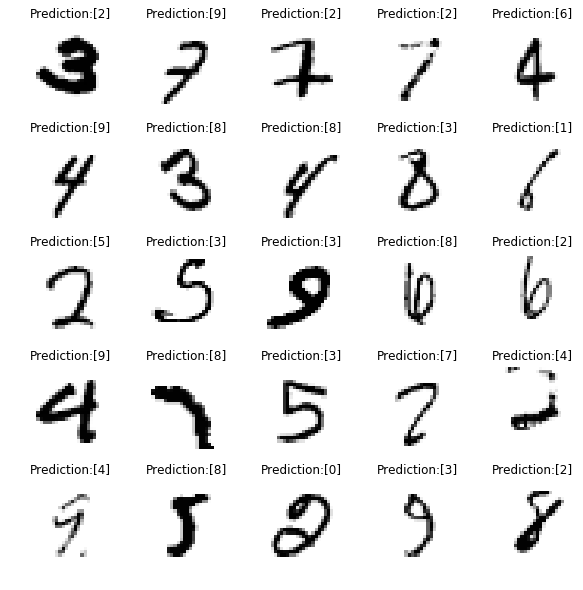

In [49]:
false_index = []

for i, label in enumerate(y_test):
    if label != predictions[i]:
        false_index.append(i)

fig, axs = plt.subplots(5, 5)
plt.subplots_adjust(hspace=0.3)
fig.set_size_inches(10,10)

for i, ax in enumerate(axs.flat):
    shift = np.random.randint(0, len(false_index) - 25)
    index = false_index[i + shift]
    ax.imshow(x_test[index], cmap = 'Greys')
    ax.set_title('Prediction:{}'.format(str((predictions[index]))))
    ax.axis('off')

plt.savefig('images/MLN_false_digits.png', dpi = 100)

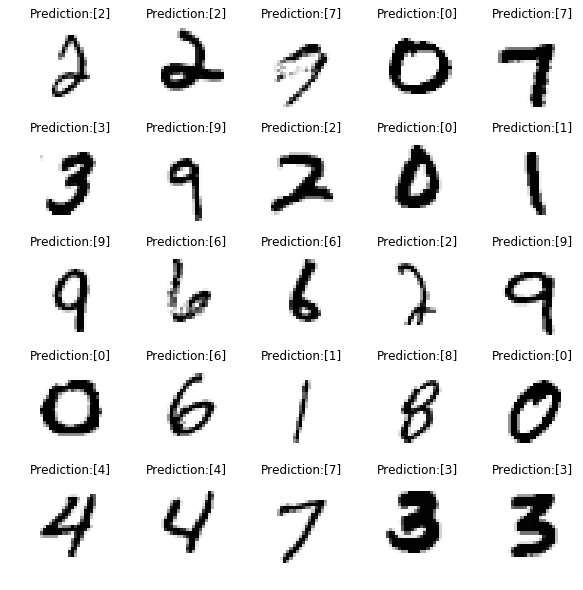

In [47]:
fig, axs = plt.subplots(5, 5)
plt.subplots_adjust(hspace=0.3)
fig.set_size_inches(10,10)

for i, ax in enumerate(axs.flat):
    shift = np.random.randint(0, 10000)
    index = i + shift
    ax.imshow(x_test[index],cmap = 'Greys')
    ax.set_title('Prediction:{}'.format(str((predictions[index]))))
    ax.axis('off')

plt.savefig('images/MLN_correct_digits.png', dpi = 100)

In [46]:
len(false_index)

455